# Загрузка Pandas и очистка данных

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import datetime
from datetime import datetime, timedelta

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('main_task.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [3]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
# Обработка для Cuisine Style
def str_to_list(string):
    if pd.isnull(string):
        return []
    else:
        string = string.replace('"', '')
        string = string.replace('[', '')
        string = string.replace(']', '')
        string = string.replace("'", '')
        return string.split(', ')


# Обработка для Reviews
def reviews_to_list(string):
    if string == '[[], []]':
        return []
    else:
        string = string.replace(']]', '')
        string = string.replace("'", '')
        string = string.split('], [')[1]
        string = string.split(', ')
        return string

In [5]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
16725,id_1619,Munich,['Cafe'],1632.0,5.0,NaN,4.0,"[['Great Bio offers'], ['05/20/2017']]",/Restaurant_Review-g187309-d11014363-Reviews-T...,d11014363
35905,id_5872,Barcelona,['Cafe'],5873.0,4.0,$,NaN,"[['Freshness'], ['08/02/2016']]",/Restaurant_Review-g187497-d10497174-Reviews-P...,d10497174
3692,id_532,Milan,"['Japanese', 'Seafood', 'Sushi']",533.0,4.5,$$ - $$$,441.0,"[['Ridiculously expensive experience!', 'my fa...",/Restaurant_Review-g187849-d782156-Reviews-Mam...,d782156
1391,id_2961,Prague,['Grill'],2968.0,4.0,NaN,NaN,"[['Sympathethic and nice place'], ['08/23/2015']]",/Restaurant_Review-g274707-d7123548-Reviews-Pc...,d7123548
6839,id_2849,Milan,"['Sushi', 'Fusion', 'Street Food']",2851.0,5.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187849-d13167018-Reviews-F...,d13167018


In [6]:
data = data[data['Restaurant_id'] != '#error']

In [7]:
data = data[data['ID_TA'] != '#error']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.4+ MB


In [9]:
data['URL_TA'][8419]

'/Restaurant_Review-g186338-d780583-Reviews-Gaucho_Charlotte_Street-London_England.html'

In [10]:
data['Reviews'][1]

"[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]"

In [11]:
data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Rating',
       'Price Range', 'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA'],
      dtype='object')

In [12]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Number_of_Reviews_isNAN'].value_counts()

0    37457
1     2543
Name: Number_of_Reviews_isNAN, dtype: int64

In [13]:
# смотрим категориальные признаки

data.nunique(dropna=False)

Restaurant_id              11909
City                          31
Cuisine Style               9008
Ranking                    11936
Rating                         9
Price Range                    4
Number of Reviews           1460
Reviews                    33516
URL_TA                     39980
ID_TA                      39980
Number_of_Reviews_isNAN        2
dtype: int64

#### Работа с дублями
(как показала практика - их очень много)

In [14]:
# т.к. это база Trip_Adviser, то начнем с их уникального идентификатора ресторана в базе данных

data['ID_TA'].value_counts()

d7337366     2
d11921719    2
d13002276    2
d11999956    2
d3685055     2
            ..
d1097463     1
d4472311     1
d8460858     1
d3703217     1
d13298288    1
Name: ID_TA, Length: 39980, dtype: int64

In [15]:
# посмотрим внутри на примере одного дубля

data_ID_TA = data[data['ID_TA'] == 'd9877640']
data_ID_TA

# все одинаково кроме 'Restaurant-id'

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN
15295,id_475,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,0
15565,id_530,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,0


In [16]:
# чтобы удостовериться в повторяемости дублей посмотрим следующий признак 'URL_TA'

data['URL_TA'].value_counts()

/Restaurant_Review-g187514-d9802625-Reviews-La_Vie_en_Doux-Madrid.html                            2
/Restaurant_Review-g187514-d7337366-Reviews-Lady_Madonna-Madrid.html                              2
/Restaurant_Review-g187514-d1315077-Reviews-El_Pimiento_Verde-Madrid.html                         2
/Restaurant_Review-g187514-d987900-Reviews-Compostela_Restaurante-Madrid.html                     2
/Restaurant_Review-g187514-d4600226-Reviews-Cafeteria_Teresa-Madrid.html                          2
                                                                                                 ..
/Restaurant_Review-g187497-d5820228-Reviews-The_Box-Barcelona_Catalonia.html                      1
/Restaurant_Review-g189541-d9561974-Reviews-Ristorante_Buono-Copenhagen_Zealand.html              1
/Restaurant_Review-g187849-d12447161-Reviews-Le_Biciclette_Art_Bar_Bistrot-Milan_Lombardy.html    1
/Restaurant_Review-g186605-d5863819-Reviews-The_Farmhouse_Cafe-Dublin_County_Dublin.html          1


In [17]:
# дубли есть и их то же количество
# посмотрим, что внутри.
data_ID_TA = data[data['URL_TA'] == '/Restaurant_Review-g187514-d9877640-Reviews-Raku_Sushi-Madrid.html']
data_ID_TA
# полное совпадение с предыдущей историей

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN
15295,id_475,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",476.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,0
15565,id_530,Madrid,"['Japanese', 'Vegetarian Friendly', 'Vegan Opt...",531.0,4.5,$$ - $$$,67.0,"[['Whenever in Madrid, we never miss this gem....",/Restaurant_Review-g187514-d9877640-Reviews-Ra...,d9877640,0


In [18]:
# с чистой совестью могу удалить дубли (проверка показала, что также исчезли дубли и в 'URL_TA')

data.drop_duplicates(subset=['ID_TA'], inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39980 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39980 non-null  object 
 1   City                     39980 non-null  object 
 2   Cuisine Style            30701 non-null  object 
 3   Ranking                  39980 non-null  float64
 4   Rating                   39980 non-null  float64
 5   Price Range              26101 non-null  object 
 6   Number of Reviews        37437 non-null  float64
 7   Reviews                  39980 non-null  object 
 8   URL_TA                   39980 non-null  object 
 9   ID_TA                    39980 non-null  object 
 10  Number_of_Reviews_isNAN  39980 non-null  uint8  
dtypes: float64(3), object(7), uint8(1)
memory usage: 3.4+ MB


In [20]:
# посмотрим на дубли в 'Restaurant_id'

data['Restaurant_id'].value_counts()

id_871      18
id_436      18
id_633      18
id_227      18
id_71       17
            ..
id_9741      1
id_4438      1
id_11552     1
id_8309      1
id_10778     1
Name: Restaurant_id, Length: 11907, dtype: int64

In [21]:
# посмотрим на содержимое

data_ID = data[data['Restaurant_id'] == 'id_871']
data_ID.sample(7)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN
31576,id_871,Lyon,NaN,872.0,4.0,NaN,43.0,"[[], []]",/Restaurant_Review-g661468-d7214794-Reviews-Re...,d7214794,0
36687,id_871,Madrid,['Spanish'],872.0,4.0,$$ - $$$,327.0,"[['Great cocido!', 'Delicious'], ['11/19/2017'...",/Restaurant_Review-g187514-d4187302-Reviews-Cr...,d4187302,0
26161,id_871,Edinburgh,"['Italian', 'Wine Bar']",872.0,5.0,$$ - $$$,8.0,"[['Great fine - simple, friendly and nice win....",/Restaurant_Review-g186525-d12868167-Reviews-B...,d12868167,0
11434,id_871,Berlin,"['Asian', 'Vegetarian Friendly', 'Gluten Free ...",872.0,4.5,$$ - $$$,37.0,"[['Honest, fun and so good!', 'Amazing!!'], ['...",/Restaurant_Review-g187323-d12165690-Reviews-M...,d12165690,0
1172,id_871,Geneva,['International'],876.0,4.0,$$ - $$$,28.0,[['Wild Girls Mess - A place Where Staff igno....,/Restaurant_Review-g188057-d4462793-Reviews-BG...,d4462793,0
36816,id_871,Brussels,"['Italian', 'Pizza', 'European', 'Mediterranea...",872.0,4.0,$$ - $$$,39.0,"[['I lovely this family restaurant', 'Good piz...",/Restaurant_Review-g188644-d4608409-Reviews-La...,d4608409,0
22885,id_871,Barcelona,"['Mediterranean', 'Wine Bar', 'International',...",872.0,4.5,$$$$,102.0,"[['Great wine tasting', 'Excellent meal with a...",/Restaurant_Review-g187497-d7332637-Reviews-Bo...,d7332637,0


Анализ 'Restaurant_id' показал, что первые две цифры совпадают с первыми двумя цифрами в 'Ranking' место ресторана в городе. Можно сгруппировать и ввести новый признак. Это сделано в конце. Удалять дубли нецелесообразно.

### City
посмотрим параметр City

In [22]:
data['City'].value_counts(dropna = False)

London        5757
Paris         4897
Madrid        3088
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: City, dtype: int64

In [23]:
# Добавил в датасет население городов City_pop - внешний источник данных: Википедия. данные на 2018 год

dict_tmp = {
    'London': 8787892,
    'Paris': 2140526,
    'Madrid': 3223334,
    'Barcelona': 1620343,
    'Berlin': 3601131,
    'Milan': 1366180,
    'Rome': 2872800,
    'Prague': 1280508,
    'Lisbon': 505526,
    'Vienna': 1840573,
    'Amsterdam': 859732,
    'Brussels': 144784,
    'Hamburg': 1830584,
    'Munich': 1456039,
    'Lyon': 515695,
    'Stockholm': 961609,
    'Budapest': 1749734,
    'Warsaw': 1758143,
    'Dublin': 553165,
    'Copenhagen': 615993,
    'Athens': 655780,
    'Edinburgh': 476100,
    'Zurich': 402275,
    'Oporto': 221800,
    'Geneva': 196150,
    'Krakow': 766739,
    'Oslo': 673469,
    'Helsinki': 643272,
    'Bratislava': 413192,
    'Luxembourg': 576249,
    'Ljubljana': 277554
}

data['City_pop'] = data['City'].apply(lambda x: dict_tmp[x])

In [24]:
# добавил бинарный признак столица или нет.

dict_tmp = {
    'London': 1,
    'Paris': 1,
    'Madrid': 1,
    'Barcelona': 0,
    'Berlin': 1,
    'Milan': 0,
    'Rome': 1,
    'Prague': 1,
    'Lisbon': 1,
    'Vienna': 1,
    'Amsterdam': 1,
    'Brussels': 1,
    'Hamburg': 0,
    'Munich': 0,
    'Lyon': 0,
    'Stockholm': 1,
    'Budapest': 1,
    'Warsaw': 1,
    'Dublin': 1,
    'Copenhagen': 1,
    'Athens': 1,
    'Edinburgh': 1,
    'Zurich': 1,
    'Oporto': 0,
    'Geneva': 1,
    'Krakow': 0,
    'Oslo': 1,
    'Helsinki': 1,
    'Bratislava': 1,
    'Luxembourg': 1,
    'Ljubljana': 1
}

data['Capital'] = data['City'].apply(lambda x: dict_tmp[x])

Добавим столбец Country - название страны.

In [25]:
dict_tmp = {
    'London': 'UK',
    'Paris': 'FR',
    'Madrid': 'ESP',
    'Barcelona': 'ESP',
    'Berlin': 'GER',
    'Milan': 'IT',
    'Rome': 'IT',
    'Prague': 'CZ',
    'Lisbon': 'PO',
    'Vienna': 'AUS',
    'Amsterdam': 'NDL',
    'Brussels': 'BLG',
    'Hamburg': 'GER',
    'Munich': 'GER',
    'Lyon': 'FR',
    'Stockholm': 'SWE',
    'Budapest': 'HUN',
    'Warsaw': 'PL',
    'Dublin': 'IRL',
    'Copenhagen': 'DM',
    'Athens': 'GRC',
    'Edinburgh': 'SCT',
    'Zurich': 'SWZ',
    'Oporto': 'PO',
    'Geneva': 'SWZ',
    'Krakow': 'PL',
    'Oslo': 'NOR',
    'Helsinki': 'FIN',
    'Bratislava': 'SVK',
    'Luxembourg': 'LUX',
    'Ljubljana': 'SVN'
}

data['Country'] = data['City'].apply(lambda x: dict_tmp[x])

In [26]:
data['Country'].nunique()

23

In [27]:
data_tmp = data['Country'].value_counts()
data['Rest_Count_Country'] = data['Country'].apply(lambda x: data_tmp[x])

In [28]:
# Создадим признак Rest_counts - кол-во ресторанов в городе.

data_tmp = data['City'].value_counts()
data['R_counts'] = data['City'].apply(lambda x: data_tmp[x])

In [29]:
# Добавим столбец R_City_concentration - коэффициент распределения ресторанов в городах страны.
data['Rest_City_concentration'] = data['R_counts'] / data['Rest_Count_Country']

In [30]:
# с сайта World Tourism Organization (UNWTO) скачал отчет https://www.e-unwto.org/doi/book/10.18111/9789284419876
# взял значение, сколько тратит в среднем один турист при посещении той или иной страны в долл.США.

dict_tmp = {
    'UK': 1337.63,
    'FR': 659.38,
    'ESP': 803.33,
    'GER': 1052.25,
    'IT': 768.46,
    'CZ': 492.58,
    'PO': 771.21,
    'AUS': 684.90,
    'NDL': 887.92,
    'BLG': 1552.20,
    'SWE': 1944.50,
    'HUN': 371.26,
    'PL': 628.59,
    'IRL': 513.47,
    'DM': 653.65,
    'GRC': 589.50,
    'SCT': 1337.63,
    'SWZ': 1562.87,
    'NOR': 873.15,
    'FIN': 979.20,
    'SVK': 412.37,
    'LUX': 3867.17,
    'SVN': 799.47
}

data['spend_visitor'] = data['Country'].apply(lambda x: dict_tmp[x])

In [31]:
data.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN,City_pop,Capital,Country,Rest_Count_Country,R_counts,Rest_City_concentration,spend_visitor
11556,id_2400,Hamburg,['German'],2404.0,3.5,$$ - $$$,22.0,"[['Poor service', 'Light, natural and deliciou...",/Restaurant_Review-g187331-d3865420-Reviews-Wi...,d3865420,0,1830584,0,GER,3997,949,0.237428,1052.25
28536,id_832,Barcelona,"['Mediterranean', 'European', 'Spanish', 'Vege...",833.0,4.0,$$ - $$$,434.0,"[['very simple, very good', '4.5 stars'], ['11...",/Restaurant_Review-g187497-d751583-Reviews-La_...,d751583,0,1620343,0,ESP,5822,2734,0.469598,803.33
23231,id_16362,London,"['Indian', 'Asian', 'Bangladeshi', 'Halal']",16380.0,1.0,NaN,2.0,"[['Very Small Portions', 'Stay very away'], ['...",/Restaurant_Review-g186338-d10765583-Reviews-M...,d10765583,0,8787892,1,UK,5757,5757,1.000000,1337.63


In [32]:
data.drop(['Rest_Count_Country'], axis=1, inplace=True)

#### Number of Reviews 
количество отзывов о ресторане. чем больше город, тем больше отзывов.

In [33]:
# распределение количества отзывов по городам.

data_tmp = data.groupby(['City'])['Number of Reviews'].sum().sort_values(ascending=False)
data_tmp

City
London        746139.0
Rome          583983.0
Paris         561444.0
Milan         352637.0
Barcelona     337566.0
Madrid        289335.0
Prague        159005.0
Lisbon        153705.0
Amsterdam     151909.0
Edinburgh     134393.0
Berlin        129786.0
Budapest      119171.0
Dublin         99463.0
Vienna         89407.0
Brussels       88021.0
Lyon           73148.0
Munich         67301.0
Oporto         64979.0
Stockholm      59075.0
Athens         58039.0
Copenhagen     56498.0
Krakow         50035.0
Warsaw         42169.0
Hamburg        40576.0
Zurich         39167.0
Oslo           34745.0
Geneva         27793.0
Helsinki       21252.0
Luxembourg     16184.0
Bratislava     13697.0
Ljubljana      12646.0
Name: Number of Reviews, dtype: float64

In [34]:
# количество отзывов в каждом городе
data['Rev_num_city'] = data['City'].apply(lambda x: data_tmp[x])

In [35]:
# Добавим параметр Rel_num_rev - ранг ресторана по количеству отзывов о ресторанах в городе.
data['Rel_num_rev'] = data['Ranking'] / data['Rev_num_city']

In [36]:
data.drop(['Rev_num_city'], axis=1, inplace=True)

#### 'Rating'
посмотрим признак rating

In [37]:
data['Rating'].value_counts(dropna = False)
# ошибок нет, пустых нет.

4.0    13684
4.5    10924
3.5     6821
5.0     3875
3.0     2955
2.5      915
2.0      466
1.0      201
1.5      139
Name: Rating, dtype: int64

count    39980.000000
mean         3.992909
std          0.668471
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

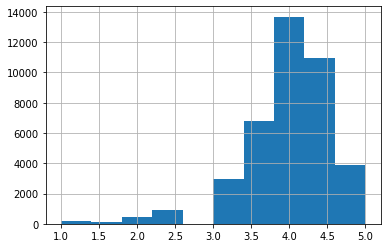

In [38]:
data['Rating'].hist()
data['Rating'].describe()

25-й перцентиль: 3.5, 75-й перцентиль: 4.5, IQR: 1.0,  Границы выбросов: [2.0, 6.0].


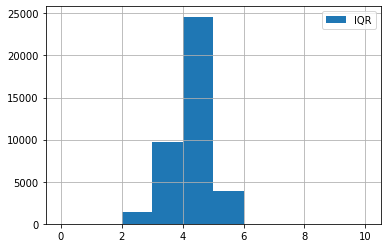

In [39]:
median_r = data['Rating'].median()
IQR_r = data['Rating'].quantile(0.75) - data['Rating'].quantile(0.25)
perc25 = data['Rating'].quantile(0.25)
perc75 = data['Rating'].quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR_r),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR_r, l=perc75 + 1.5*IQR_r))
data['Rating'].loc[data['Rating'].between(perc25 - 1.5*IQR_r, perc75 + 1.5*IQR_r)].hist(bins=10, range=(0, 10),
                                                                                        label='IQR')
plt.legend()

In [40]:
data = data.loc[data['Rating'].between(perc25 - 1.5*IQR_r, perc75 + 1.5*IQR_r)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39640 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39640 non-null  object 
 1   City                     39640 non-null  object 
 2   Cuisine Style            30514 non-null  object 
 3   Ranking                  39640 non-null  float64
 4   Rating                   39640 non-null  float64
 5   Price Range              26022 non-null  object 
 6   Number of Reviews        37246 non-null  float64
 7   Reviews                  39640 non-null  object 
 8   URL_TA                   39640 non-null  object 
 9   ID_TA                    39640 non-null  object 
 10  Number_of_Reviews_isNAN  39640 non-null  uint8  
 11  City_pop                 39640 non-null  int64  
 12  Capital                  39640 non-null  int64  
 13  Country                  39640 non-null  object 
 14  R_counts              

Еще раз посмотрим столбец data 'Number_of_Reviews_isNAN'

In [41]:
data['Number of Reviews'].fillna(0, inplace=True)
#data.drop('Number_of_Reviews_isNAN', inplace = True, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39640 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39640 non-null  object 
 1   City                     39640 non-null  object 
 2   Cuisine Style            30514 non-null  object 
 3   Ranking                  39640 non-null  float64
 4   Rating                   39640 non-null  float64
 5   Price Range              26022 non-null  object 
 6   Number of Reviews        39640 non-null  float64
 7   Reviews                  39640 non-null  object 
 8   URL_TA                   39640 non-null  object 
 9   ID_TA                    39640 non-null  object 
 10  Number_of_Reviews_isNAN  39640 non-null  uint8  
 11  City_pop                 39640 non-null  int64  
 12  Capital                  39640 non-null  int64  
 13  Country                  39640 non-null  object 
 14  R_counts              

In [42]:
# проверяем пропуски в ['Number of Reviews'].
data['Number_of_Reviews_isNAN'].value_counts(dropna=False)

0    37246
1     2394
Name: Number_of_Reviews_isNAN, dtype: int64

### EDA_RDS

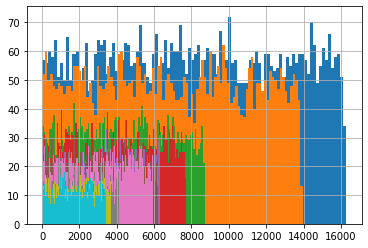

In [43]:
#Ranking — место, которое занимает ресторан среди всех ресторанов города. Посмотрим на данные.

for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Можно предположить, что ресторан занимает 10е место из 1000, то он очень хороший, а если 10е место из 10, то плохой.
Введем параметр Ranking_rel - относительный ранг от количества ресторанов в городе

In [44]:
# параметр Relative_rank - относительного ранга = ранг / кол-во ресторанов в городе.
data['Ranking_rel'] = round((data['Ranking'] / data['R_counts']), 2)

In [45]:
data.sample(8)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN,City_pop,Capital,Country,R_counts,Rest_City_concentration,spend_visitor,Rel_num_rev,Ranking_rel
38777,id_3572,Prague,"['European', 'Czech', 'Eastern European', 'Cen...",3580.0,3.0,$$ - $$$,121.0,"[['Overpriced for the quality', 'Good traditio...",/Restaurant_Review-g274707-d2365741-Reviews-St...,d2365741,0,1280508,1,CZ,1443,1.000000,492.58,0.022515,2.48
16849,id_6288,Berlin,NaN,6290.0,2.5,NaN,2.0,"[['A great little restaurant'], ['10/20/2016']]",/Restaurant_Review-g187323-d11715911-Reviews-A...,d11715911,0,3601131,1,GER,2155,0.539154,1052.25,0.048464,2.92
12661,id_172,Oporto,"['Mediterranean', 'European', 'Portuguese']",173.0,4.0,$$ - $$$,436.0,"[['Wonderful food, GREAT price, meh service', ...",/Restaurant_Review-g189180-d2401909-Reviews-Mu...,d2401909,0,221800,0,PO,513,0.282956,771.21,0.002662,0.34
27600,id_2421,Lisbon,NaN,2424.0,3.5,NaN,27.0,[['Delicious Madeiran cuisine for travellers.....,/Restaurant_Review-g189158-d11747994-Reviews-C...,d11747994,0,505526,1,PO,1300,0.717044,771.21,0.015770,1.86
14972,id_821,Copenhagen,"['Cafe', 'Scandinavian', 'Danish', 'Vegetarian...",822.0,4.0,$$ - $$$,76.0,"[['The local deli and coffee shop', 'Indefinit...",/Restaurant_Review-g189541-d1799429-Reviews-Wu...,d1799429,0,615993,1,DM,659,1.000000,653.65,0.014549,1.25
26219,id_847,Barcelona,"['American', 'Fast Food', 'European']",848.0,4.5,$$ - $$$,154.0,"[[""One of the best burgers I've ever had!"", 'A...",/Restaurant_Review-g187497-d8027248-Reviews-Ni...,d8027248,0,1620343,0,ESP,2734,0.469598,803.33,0.002512,0.31
35294,id_1414,Dublin,NaN,1418.0,4.5,NaN,3.0,"[['Ms', 'Quality'], ['11/01/2016', '05/12/2016']]",/Restaurant_Review-g186605-d5821512-Reviews-Fo...,d5821512,0,553165,1,IRL,673,1.000000,513.47,0.014257,2.11
35169,id_914,Paris,"['French', 'European']",915.0,4.5,$$ - $$$,166.0,"[['Classic Bistro', 'A memorable evening'], ['...",/Restaurant_Review-g187147-d3350579-Reviews-Sc...,d3350579,0,2140526,1,FR,4897,0.845915,659.38,0.001630,0.19


In [46]:
# удаляем вспомогательный столбец

data.drop(['R_counts'], axis=1, inplace=True)

#### Price

In [47]:
# Возьмем следующий признак "Price Range".

data['Price Range'].value_counts(dropna = False)

$$ - $$$    18352
NaN         13618
$            6252
$$$$         1418
Name: Price Range, dtype: int64

In [48]:
# поменяем символьные значения на цифровые метки

data['Price Range'] = data['Price Range'].replace(['$$ - $$$', '$', '$$$$'], [2, 1, 3])

In [49]:
# найдем медиану, чтобы заполнить пропуски

median_p = int(data['Price Range'].median())

In [50]:
data['Price Range'] = data['Price Range'].fillna(median_p)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39640 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39640 non-null  object 
 1   City                     39640 non-null  object 
 2   Cuisine Style            30514 non-null  object 
 3   Ranking                  39640 non-null  float64
 4   Rating                   39640 non-null  float64
 5   Price Range              39640 non-null  float64
 6   Number of Reviews        39640 non-null  float64
 7   Reviews                  39640 non-null  object 
 8   URL_TA                   39640 non-null  object 
 9   ID_TA                    39640 non-null  object 
 10  Number_of_Reviews_isNAN  39640 non-null  uint8  
 11  City_pop                 39640 non-null  int64  
 12  Capital                  39640 non-null  int64  
 13  Country                  39640 non-null  object 
 14  Rest_City_concentratio

#### 'Cuisine Style'
повозимся с кухнями

In [52]:
# Преобразуем кухони в списки

data['Cuisine_Style_list'] = data['Cuisine Style'].apply(str_to_list)
#df.drop(['Cuisine Style'], axis=1, inplace=True)

In [53]:
# Посмотрим какие кухни бывают

cuisine_set = set()
for cuis_list in data['Cuisine_Style_list']:
    for cuis in cuis_list:
        cuisine_set.add(cuis)

print('Всего кухонь: ', len(cuisine_set))

Всего кухонь:  125


In [54]:
# Считаем сколько раз кухня встречается в ресторанах
cuisine_count = dict.fromkeys(cuisine_set, 0)
for cuis in cuisine_set:
    for cuis_list in data['Cuisine_Style_list']:
        if cuis in cuis_list:
            cuisine_count[cuis] += 1

cuisine_count = pd.Series(cuisine_count)
cuisine_count.sort_values(ascending=False)

Vegetarian Friendly    11181
European               10034
Mediterranean           6253
Italian                 5938
Vegan Options           4481
                       ...  
Salvadoran                 1
Latvian                    1
Yunnan                     1
Xinjiang                   1
Burmese                    1
Length: 125, dtype: int64

In [55]:
# самая популярная кухня Vegetarian Friendly.

cuis_nan = 'Vegetarian Friendly'
data['Cuisine Style'].fillna(cuis_nan, inplace=True)
data['Cuisine_Style_list'] = data['Cuisine Style'].apply(str_to_list)

# далее, в разделе dummy переменные мы будем использовать эти данные для формирования новых признаков.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39640 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39640 non-null  object 
 1   City                     39640 non-null  object 
 2   Cuisine Style            39640 non-null  object 
 3   Ranking                  39640 non-null  float64
 4   Rating                   39640 non-null  float64
 5   Price Range              39640 non-null  float64
 6   Number of Reviews        39640 non-null  float64
 7   Reviews                  39640 non-null  object 
 8   URL_TA                   39640 non-null  object 
 9   ID_TA                    39640 non-null  object 
 10  Number_of_Reviews_isNAN  39640 non-null  uint8  
 11  City_pop                 39640 non-null  int64  
 12  Capital                  39640 non-null  int64  
 13  Country                  39640 non-null  object 
 14  Rest_City_concentratio

У нас все столбцы не имеют пустых значений. Дальше будем добавлять новые признаки.

#### Reviews - Даты отзывов
Продолжим работать с отзывами.

Создадим столбцы Reviews_date_first и Reviews_date_last с первой и последней датой отзывов, соответственно.

In [57]:
data['Reviews_date_temp'] = data['Reviews'].apply(reviews_to_list)
data['Reviews_date_first'] = data['Reviews_date_temp'].apply(
    lambda x: None if len(x) == 0
    else pd.to_datetime(x[0], format='%m/%d/%Y') if len(x) == 1
    else pd.to_datetime(x[0], format='%m/%d/%Y') if pd.to_datetime(x[0], format='%m/%d/%Y') < pd.to_datetime(x[1], format='%m/%d/%Y')
    else pd.to_datetime(x[1], format='%m/%d/%Y'))
data['Reviews_date_last'] = data['Reviews_date_temp'].apply(
    lambda x: None if len(x) == 0
    else pd.to_datetime(x[0], format='%m/%d/%Y') if len(x) == 1
    else pd.to_datetime(x[0], format='%m/%d/%Y') if pd.to_datetime(x[0], format='%m/%d/%Y') > pd.to_datetime(x[1], format='%m/%d/%Y')
    else pd.to_datetime(x[1], format='%m/%d/%Y'))

Заполним прлпуски в датах средними значениями для каждой категории: датой первого отзыва и датой последнего отзыва

In [58]:
min_date = data['Reviews_date_first'].mean()

In [59]:
max_date = data['Reviews_date_last'].mean()

In [60]:
# Заполним пропуски средней датой

data['Reviews_date_first'] = data['Reviews_date_first'].apply(
    lambda x: min_date if pd.isnull(x) else min_date if x == None else x)
data['Reviews_date_last'] = data['Reviews_date_last'].apply(
    lambda x: max_date if pd.isnull(x) else min_date if x == None else x)

In [61]:
# Создадим параметр date_delta - сколько дней прошло между первым и последним отзывом.

data['delta_days'] = (data['Reviews_date_last'] - data['Reviews_date_first']).dt.days

In [62]:
# Создадим параметр Rev_year - год последнего отзыва. Возможно, с годами уровень лояльности пользователей меняется.

data['Rev_last_year'] = data['Reviews_date_last'].dt.year

In [63]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,...,Rest_City_concentration,spend_visitor,Rel_num_rev,Ranking_rel,Cuisine_Style_list,Reviews_date_temp,Reviews_date_first,Reviews_date_last,delta_days,Rev_last_year
13710,id_867,Prague,"['European', 'Soups', 'Fast Food', 'Vegetarian...",868.0,4.5,1.0,41.0,"[['The best salads in town', 'Fresh!'], ['10/0...",/Restaurant_Review-g274707-d8664387-Reviews-Gr...,d8664387,...,1.000000,492.58,0.005459,0.60,"[European, Soups, Fast Food, Vegetarian Friend...","[10/08/2017, 09/06/2017]",2017-09-06,2017-10-08,32,2017
14510,id_3162,Amsterdam,"['Italian', 'Argentinean', 'South American']",3173.0,2.5,2.0,5.0,"[['DO NOT GO THERE'], ['11/04/2017']]",/Restaurant_Review-g188590-d12980391-Reviews-M...,d12980391,...,1.000000,887.92,0.020888,2.92,"[Italian, Argentinean, South American]",[11/04/2017],2017-11-04,2017-11-04,0,2017
33791,id_1827,London,"['Cafe', 'British', 'Vegetarian Friendly', 'Ve...",1831.0,4.5,1.0,102.0,"[['Nice place', 'Great Find'], ['12/03/2017', ...",/Restaurant_Review-g186338-d1457059-Reviews-Pr...,d1457059,...,1.000000,1337.63,0.002454,0.32,"[Cafe, British, Vegetarian Friendly, Vegan Opt...","[12/03/2017, 11/19/2017]",2017-11-19,2017-12-03,14,2017
24463,id_10489,London,"['Asian', 'Thai']",10498.0,3.5,1.0,22.0,"[['Quick and easy Thai food', 'No idea what th...",/Restaurant_Review-g186338-d8331750-Reviews-Ne...,d8331750,...,1.000000,1337.63,0.014070,1.82,"[Asian, Thai]","[12/14/2017, 11/30/2017]",2017-11-30,2017-12-14,14,2017
16126,id_3510,Lisbon,"['European', 'Portuguese']",3514.0,3.0,2.0,9.0,"[['Good coffee', 'Local produce at hidden gem'...",/Restaurant_Review-g189158-d10399941-Reviews-L...,d10399941,...,0.717044,771.21,0.022862,2.70,"[European, Portuguese]","[08/13/2016, 08/10/2016]",2016-08-10,2016-08-13,3,2016


In [64]:
# Удалим лишние столбцы, на основе которых работали с датами.

data.drop(['Reviews_date_temp', 'Reviews_date_first','Reviews_date_last'], axis=1, inplace=True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39640 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant_id            39640 non-null  object 
 1   City                     39640 non-null  object 
 2   Cuisine Style            39640 non-null  object 
 3   Ranking                  39640 non-null  float64
 4   Rating                   39640 non-null  float64
 5   Price Range              39640 non-null  float64
 6   Number of Reviews        39640 non-null  float64
 7   Reviews                  39640 non-null  object 
 8   URL_TA                   39640 non-null  object 
 9   ID_TA                    39640 non-null  object 
 10  Number_of_Reviews_isNAN  39640 non-null  uint8  
 11  City_pop                 39640 non-null  int64  
 12  Capital                  39640 non-null  int64  
 13  Country                  39640 non-null  object 
 14  Rest_City_concentratio

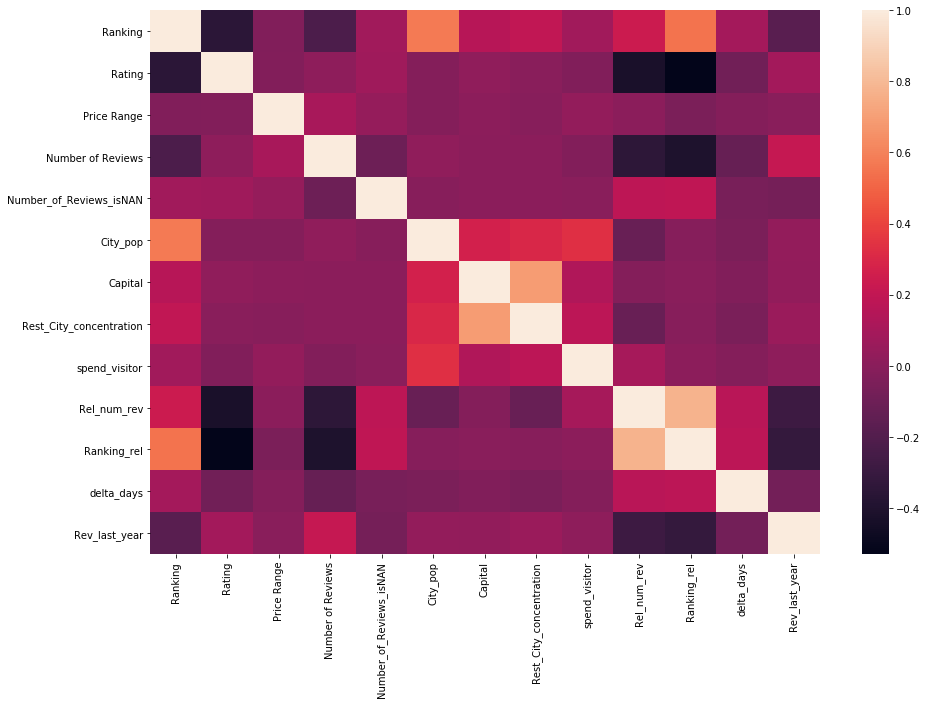

In [66]:
# перед dummy переменными посмотрим корреляцию между собой параметров
#data.corr()

plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data.corr())

Сильно скоррелированных между собой показателей нет. Можно работать дальше с таблицей.

### Dummy переменные
превращаем в dummy 

#### Reviews 
поработаем с ключевыми словами в отзывах, которые могут повлиять на рейтинг и выведем признак каждого ключевого слова в отдельный столбец:

- Terrible
- Horrible
- Not good
- Disappointing
- Worst
- Better
- Bad
- Excellent
- Best
- Amazing
- Great
- Wonderful 
- Super
- Good food
- delicious
- but
- not

ключевых слов возможно найти больше, если бы было побольше времени :) я пробовал пакте nltk, но так толком не смог разобраться. Если бы выбрал самые часто встерчающиеся ключесвые слова, то модель можно собрать точнее.

In [67]:
# создаем dummy по отзывам

data['R_terrible'] = data['Reviews'].apply(
    lambda x: 1 if 'terrible' in x.lower() else 0)
data['R_horrible'] = data['Reviews'].apply(
    lambda x: 1 if 'horrible' in x.lower() else 0)
data['R_not_good'] = data['Reviews'].apply(
    lambda x: 1 if 'not good' in x.lower() else 0)
data['R_disappointing'] = data['Reviews'].apply(
    lambda x: 1 if 'disappointing' in x.lower() else 0)
data['R_worst'] = data['Reviews'].apply(
    lambda x: 1 if 'worst' in x.lower() else 0)
data['R_bad'] = data['Reviews'].apply(
    lambda x: 1 if 'bad' in x.lower() else 0)
data['R_better'] = data['Reviews'].apply(
    lambda x: 1 if 'better' in x.lower() else 0)
data['R_excellent'] = data['Reviews'].apply(
    lambda x: 1 if 'excellent' in x.lower() else 0)
data['R_best'] = data['Reviews'].apply(
    lambda x: 1 if 'best' in x.lower() else 0)
data['R_amazing'] = data['Reviews'].apply(
    lambda x: 1 if 'amazing' in x.lower() else 0)
data['R_great'] = data['Reviews'].apply(
    lambda x: 1 if 'great' in x.lower() else 0)
data['R_wonderful'] = data['Reviews'].apply(
    lambda x: 1 if 'wonderful' in x.lower() else 0)
data['R_super'] = data['Reviews'].apply(
    lambda x: 1 if 'super' in x.lower() else 0)
data['R_good_food'] = data['Reviews'].apply(
    lambda x: 1 if 'good_food' in x.lower() else 0)
data['R_delicious'] = data['Reviews'].apply(
    lambda x: 1 if 'delicious' in x.lower() else 0)
data['R_but'] = data['Reviews'].apply(
    lambda x: 1 if 'but' in x.lower() else 0)
data['R_not'] = data['Reviews'].apply(
    lambda x: 1 if 'not' in x.lower() else 0)

##### 'Cuisine Style'

In [68]:
#Переформатируем информацию о кухнях в dummy-переменные.

for cuis in cuisine_set:
    data[cuis] = 0
    data[cuis] = data['Cuisine Style'].apply(lambda x: 1 if cuis in x else 0)

# теперь уберем вспомогательный столбец
data.drop(['Cuisine_Style_list'], axis=1, inplace=True)

In [69]:
# из кухонь возможно можно было вытащить еще, но надо больше времени. 
# там есть интересная взаимосвязь со странами и городами. 
# пробовал количество типов кухонь на ресторан, но MAE не очень сильно изменился. 
# Удаляю столбец

data.drop(['Cuisine Style'], axis=1, inplace=True)

##### 'City'
это из basline пример

In [70]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na

data = pd.get_dummies(data, columns=['City'])

In [71]:
data.sample(3)

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Number_of_Reviews_isNAN,City_pop,...,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich
476,id_1243,1244.0,4.5,2.0,12.0,"[['Busy, modern restaurant with good food', 'A...",/Restaurant_Review-g274856-d4781734-Reviews-St...,d4781734,0,1758143,...,0,0,0,0,0,0,0,0,1,0
32544,id_1620,1621.0,4.5,2.0,8.0,"[['Very nice atmosphere', 'Nice food, good ser...",/Restaurant_Review-g188644-d1940683-Reviews-Be...,d1940683,0,144784,...,0,0,0,0,0,0,0,0,0,0
17344,id_1451,1452.0,3.5,2.0,46.0,"[['Excellent choice.', 'Friendly restaurant'],...",/Restaurant_Review-g947638-d11698368-Reviews-L...,d11698368,0,144784,...,0,0,0,0,0,0,0,0,0,0


#### ID_TA — идентификатор ресторана в базе данных TripAdvisor

In [72]:
#Предположим, что индентификатор присваивается последовательно в момент регистрации ресторана на сайте TripAdvisor, 
#может влиять на рейтинг.

data['ID_TA_num'] = data['ID_TA'].apply(lambda x: int(x[1:]))

In [73]:
# Удалим теперь уже не нужные столбцы, на основе которых работали

data.drop(['Reviews','ID_TA', 'URL_TA', 'Country'], axis=1, inplace=True)

In [74]:
data.sample(3)

,Restaurant_id,Ranking,Rating,Price Range,Number of Reviews,Number_of_Reviews_isNAN,City_pop,Capital,Rest_City_concentration,spend_visitor,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,ID_TA_num
4115,id_2876,2879.0,4.0,2.0,0.0,1,505526,1,0.717044,771.21,...,0,0,0,0,0,0,0,0,0,12645762
11769,id_3708,3715.0,4.0,2.0,251.0,0,8787892,1,1.000000,1337.63,...,0,0,0,0,0,0,0,0,0,1487036
16621,id_1311,1312.0,4.5,2.0,24.0,0,1620343,0,0.469598,803.33,...,0,0,0,0,0,0,0,0,0,12900140


### Restaurant_id

In [75]:
# у Restaurant_id значения частично совпадают с Rating можно создать кластеры если убрать индекс

data['Rest_id_cl'] = data['Restaurant_id'].apply(lambda x: round(int(x[3:])/10))

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [76]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = data.drop(['Restaurant_id','Rating'], axis = 1)
y = data['Rating']

In [77]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [78]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Создаём, обучаем и тестируем модель

In [79]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [80]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [81]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1956842835519677
